# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("dataset/dataset_final.csv")
print("Number of rows in the dataset:", len(dataset))

pd.set_option('display.max_columns', None)
dataset.head(10)

Number of rows in the dataset: 52160


,Time,Driver,LapTime,LapNumber,Stint,Compound,TyreLife,FreshTyre,Team,RoundNumber,EventName,Session,EventYear,TimeWeather,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,FuelLevel
0,1863.689,VER,91.295,3.0,2.0,SOFT,3.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,1841.346,24.2,16.0,1017.5,False,28.7,352,0.6,2.0
1,3315.214,VER,90.503,8.0,4.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,3281.491,23.8,20.0,1017.7,False,27.8,342,0.5,2.0
2,4551.213,VER,89.897,11.0,5.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,4541.500,23.1,31.0,1017.7,False,26.9,338,1.3,2.0
3,5034.472,VER,89.708,14.0,6.0,SOFT,2.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,5021.569,23.0,33.0,1017.9,False,26.6,329,0.8,2.0
4,1926.785,PER,91.479,3.0,2.0,SOFT,3.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,1901.344,24.3,16.0,1017.5,False,28.7,333,0.4,2.0
5,3322.843,PER,90.746,8.0,4.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,3281.491,23.8,20.0,1017.7,False,27.8,342,0.5,2.0
6,4557.035,PER,90.131,11.0,5.0,SOFT,2.0,True,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,4541.500,23.1,31.0,1017.7,False,26.9,338,1.3,2.0
7,5040.743,PER,89.846,14.0,6.0,SOFT,2.0,False,Red Bull Racing,1,Bahrain Grand Prix,Qualifying,2023,5021.569,23.0,33.0,1017.9,False,26.6,329,0.8,2.0
8,1899.739,LEC,91.094,5.0,2.0,SOFT,2.0,True,Ferrari,1,Bahrain Grand Prix,Qualifying,2023,1841.346,24.2,16.0,1017.5,False,28.7,352,0.6,2.0
9,3301.222,LEC,91.699,10.0,4.0,SOFT,7.0,False,Ferrari,1,Bahrain Grand Prix,Qualifying,2023,3281.491,23.8,20.0,1017.7,False,27.8,342,0.5,2.0


In [3]:
dataset.columns

Index(['Time', 'Driver', 'LapTime', 'LapNumber', 'Stint', 'Compound',
       'TyreLife', 'FreshTyre', 'Team', 'RoundNumber', 'EventName', 'Session',
       'EventYear', 'TimeWeather', 'AirTemp', 'Humidity', 'Pressure',
       'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'FuelLevel'],
      dtype='object')

In [4]:
# Standardization of original data points (mean 0 and std dev 1)
def standardize(x):
    x = x - np.mean(x)
    x = x / np.std(x)
    return x

# Manual one-hot encoding. Input: list or np array of strings
def one_hot_encode(values):
    unique = sorted(set(values))
    one_hot = np.zeros((len(values), len(unique)))
    for i, val in enumerate(values):
        one_hot[i][unique.index(val)] = 1
    return one_hot

# Get of regression data in matrix form
def build_model_data(X, y):
    b = y
    num_samples = len(b)
    A = np.c_[np.ones(num_samples), X]
    return A, b

# Extraction of input variables from the dataset
lap_time = dataset['LapTime']
event_name = dataset['EventName'] 
team = dataset['Team']
compound = dataset['Compound']
tyre_life = dataset['TyreLife'] 
fresh_tyre = dataset['FreshTyre'] 
fuel_level = dataset['FuelLevel']
air_temp = dataset['AirTemp']
humidity = dataset['Humidity'] 
pressure = dataset['Pressure']
rainfall = dataset['Rainfall'] 
track_temp = dataset['TrackTemp'] 
wind_direction = dataset['WindDirection'] 
wind_speed = dataset['WindSpeed'] 

# One-hot encoding of categorical variables
event_oh = one_hot_encode(event_name)
team_oh = one_hot_encode(team)
compound_oh = one_hot_encode(compound)
fresh_tyre_oh = one_hot_encode(fresh_tyre)
rainfall_oh = one_hot_encode(rainfall)

# Standardization of numerical variables
X_num = np.c_[
    standardize(tyre_life),
    standardize(air_temp),
    standardize(humidity),
    standardize(pressure),
    standardize(track_temp),
    standardize(wind_direction),
    standardize(wind_speed),
    standardize(fuel_level)
]

# Concatenation of all features
X = np.c_[event_oh, team_oh, compound_oh, fresh_tyre_oh, rainfall_oh, X_num]

mu_lap_time = np.mean(lap_time)
std_lap_time = np.std(lap_time)

# Model build
A, b = build_model_data(X, standardize(lap_time))


In [5]:
#
def calculate_objective(Axmb):
    """Calculate ||Ax - b||^2 for the vector Axmb = Ax - b"""
    obj = (Axmb**2).sum()
    return obj

def compute_gradient(A, x, b):
    """Compute the gradient and objective function."""
    # ***************************************************
    # YOUR CODE HERE
    Axmb = A.dot(x) - b
    grad = 2 * A.T.dot(Axmb)
    # ***************************************************
    return grad, Axmb

def gradient_descent(A, initial_x, b, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):

        # compute objective and gradient
        grad, Axmb = compute_gradient(A, x, b)
        obj = calculate_objective(Axmb)

        # ***************************************************
        # YOUR CODE HERE
        # update x by a gradient descent step
        x = x - gamma * grad
        # ***************************************************

        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l:.5f}, x=[{w0:.5f},{w1:.5f}]".format(
              bi=n_iter, ti=max_iters - 1, l=obj, w0=x[0], w1=x[1]))

    return objectives, xs

## Naive test

In [6]:
# Define the parameters of the algorithm.
max_iters = 1000
gamma = 1e-6

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
gradient_objectives_naive, gradient_xs_naive = gradient_descent(A, x_initial, b, max_iters, gamma)

Gradient Descent(0/999): objective=52160.00000, x=[0.00000,0.00040]
Gradient Descent(1/999): objective=50501.21790, x=[-0.00021,0.00067]
Gradient Descent(2/999): objective=49115.69531, x=[-0.00054,0.00082]
Gradient Descent(3/999): objective=47935.87598, x=[-0.00093,0.00086]
Gradient Descent(4/999): objective=46913.19235, x=[-0.00134,0.00081]
Gradient Descent(5/999): objective=46012.22059, x=[-0.00175,0.00068]
Gradient Descent(6/999): objective=45206.78020, x=[-0.00213,0.00047]
Gradient Descent(7/999): objective=44477.28729, x=[-0.00249,0.00019]
Gradient Descent(8/999): objective=43808.92931, x=[-0.00282,-0.00015]
Gradient Descent(9/999): objective=43190.38708, x=[-0.00310,-0.00055]
Gradient Descent(10/999): objective=42612.92726, x=[-0.00335,-0.00100]
Gradient Descent(11/999): objective=42069.74954, x=[-0.00356,-0.00149]
Gradient Descent(12/999): objective=41555.51151, x=[-0.00373,-0.00204]
Gradient Descent(13/999): objective=41065.97937, x=[-0.00386,-0.00262]
Gradient Descent(14/999):

In [7]:
def mean_squared_error(y_true, y_pred):
    """Calcola il Mean Squared Error (MSE)"""
    n = len(y_true)
    mse = np.sum((y_true - y_pred)**2) / n
    return mse

def root_mean_squared_error(y_true, y_pred):
    """Calcola il Root Mean Squared Error (RMSE)"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def r2_score_manual(y_true, y_pred):
    """Calcola il coefficiente di determinazione R²"""
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def get_results(A, b, x_final):
    y_pred = A.dot(x_final)
    y_pred_denorm = y_pred * std_lap_time + mu_lap_time
    b_denorm = b * std_lap_time + mu_lap_time

    mse = mean_squared_error(b_denorm, y_pred_denorm)
    rmse = root_mean_squared_error(b_denorm, y_pred_denorm)
    r2 = r2_score_manual(b_denorm, y_pred_denorm)

    print(f"R2: {r2}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    


In [8]:
x_final = gradient_xs_naive[-1]
get_results(A, b, x_final)


R2: 0.9526822830698577
MSE: 5.557676399775994
RMSE: 2.3574724600249297


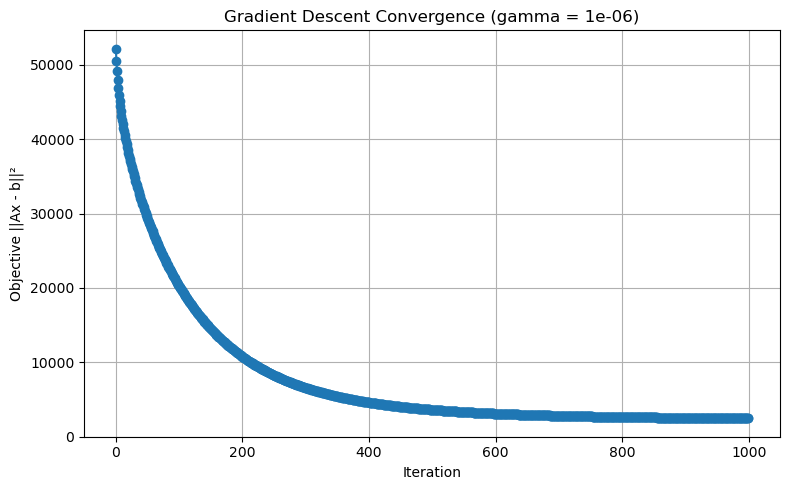

In [9]:
def plot_objective(objectives, gamma):
    """Plot the objective function values during gradient descent."""
    plt.figure(figsize=(8, 5))
    plt.plot(objectives, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Objective ||Ax - b||²')
    plt.ylim(0)
    plt.title(f'Gradient Descent Convergence (gamma = {gamma})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_objective(gradient_objectives_naive, gamma)

# Smoothness constant L

In [10]:
Q = 2 * A.T @ A
eigvals = np.linalg.eigvalsh(Q)  # autovalori di matrice simmetrica

L = np.max(eigvals)

print(f"La funzione è L-smooth con costante di Lipschitz L = {L}")

La funzione è L-smooth con costante di Lipschitz L = 320116.03193047666


Spiegare perchè posso applicare L Lipschitz

In [11]:
def calculate_L(A, b):
    """Calculate the smoothness constant for f"""
    # ***************************************************
    # YOUR CODE HERE
    # compute L = smoothness constant of f
    L = 2 * np.linalg.norm(A.T.dot(A), ord=2)
    # ***************************************************
    return L

In [12]:
# Define the parameters of the algorithm.

# ***************************************************
# YOUR CODE HERE
# a better learning rate using the smoothness of f
L = calculate_L(A, b)
gamma = 1/L
# ***************************************************

# Start gradient descent.
gradient_objectives_smooth, gradient_xs_smooth = gradient_descent(A, x_initial, b, max_iters, gamma)

Gradient Descent(0/999): objective=52160.00000, x=[0.00000,0.00125]
Gradient Descent(1/999): objective=47500.16662, x=[-0.00203,0.00120]
Gradient Descent(2/999): objective=44758.58505, x=[-0.00341,0.00033]
Gradient Descent(3/999): objective=42772.54941, x=[-0.00423,-0.00114]
Gradient Descent(4/999): objective=41155.74767, x=[-0.00459,-0.00305]
Gradient Descent(5/999): objective=39751.50452, x=[-0.00461,-0.00530]
Gradient Descent(6/999): objective=38487.34896, x=[-0.00437,-0.00782]
Gradient Descent(7/999): objective=37325.29693, x=[-0.00392,-0.01054]
Gradient Descent(8/999): objective=36242.94677, x=[-0.00332,-0.01344]
Gradient Descent(9/999): objective=35225.73224, x=[-0.00259,-0.01646]
Gradient Descent(10/999): objective=34263.47253, x=[-0.00177,-0.01960]
Gradient Descent(11/999): objective=33348.68019, x=[-0.00087,-0.02282]
Gradient Descent(12/999): objective=32475.64479, x=[0.00010,-0.02610]
Gradient Descent(13/999): objective=31639.89053, x=[0.00111,-0.02944]
Gradient Descent(14/99

In [13]:
x_final = gradient_xs_smooth[-1]
get_results(A, b, x_final)

R2: 0.9580496953048807
MSE: 4.927249949774266
RMSE: 2.2197409645664212


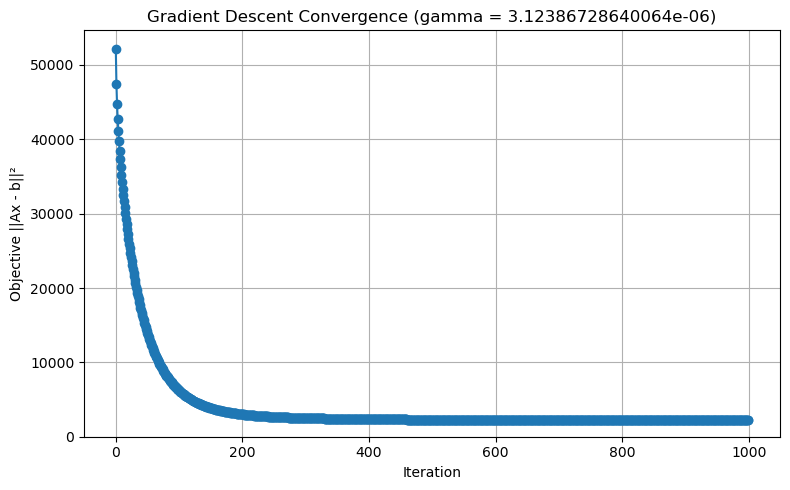

In [14]:
plot_objective(gradient_objectives_smooth, gamma)

## Assuming bounded gradients (Lipschitz function)

In [15]:
R = max(np.linalg.norm(x - x_initial) for x in gradient_xs_naive)
print(f"Stima empirica di R: {R:.4f}")


# ***************************************************
# YOUR CODE HERE
# Compute the bound B on the gradient norm
B = 2 * (R*np.linalg.norm(np.dot(A.T,A)) + np.linalg.norm(np.dot(A.T,b)))
# ***************************************************

# ***************************************************
# YOUR CODE HERE
#  Compute learning rate based on bounded gradient
gamma_bounded = R/(B*np.sqrt(max_iters))
# ***************************************************

# Start gradient descent.
gradient_objectives_bounded, gradient_xs_bounded = gradient_descent(A, x_initial, b, max_iters, gamma_bounded)

Stima empirica di R: 4.4593
Gradient Descent(0/999): objective=52160.00000, x=[0.00000,0.00003]
Gradient Descent(1/999): objective=52046.60798, x=[-0.00000,0.00005]
Gradient Descent(2/999): objective=51934.55227, x=[-0.00000,0.00008]
Gradient Descent(3/999): objective=51823.80904, x=[-0.00001,0.00010]
Gradient Descent(4/999): objective=51714.35494, x=[-0.00001,0.00013]
Gradient Descent(5/999): objective=51606.16712, x=[-0.00001,0.00015]
Gradient Descent(6/999): objective=51499.22320, x=[-0.00002,0.00017]
Gradient Descent(7/999): objective=51393.50122, x=[-0.00002,0.00019]
Gradient Descent(8/999): objective=51288.97972, x=[-0.00003,0.00022]
Gradient Descent(9/999): objective=51185.63763, x=[-0.00004,0.00024]
Gradient Descent(10/999): objective=51083.45433, x=[-0.00005,0.00026]
Gradient Descent(11/999): objective=50982.40961, x=[-0.00005,0.00028]
Gradient Descent(12/999): objective=50882.48368, x=[-0.00006,0.00030]
Gradient Descent(13/999): objective=50783.65714, x=[-0.00007,0.00032]
Gra

In [16]:
x_final = gradient_xs_bounded[-1]
get_results(A, b, x_final)

R2: 0.49958546858794217
MSE: 58.77591337383644
RMSE: 7.666545074141053


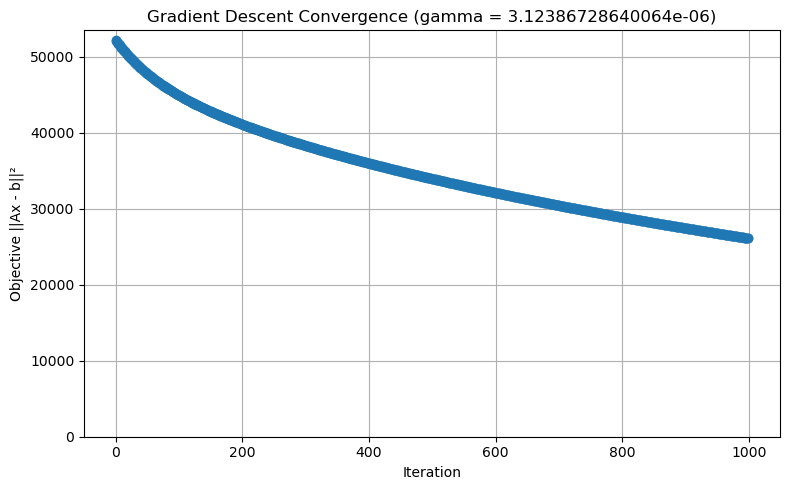

In [17]:
plot_objective(gradient_objectives_bounded, gamma)

### Risultati fino ad ora

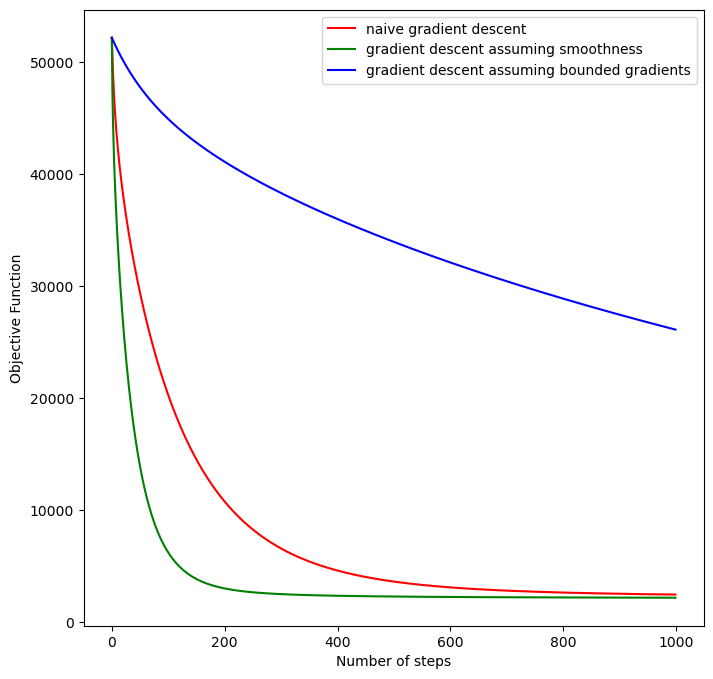

In [18]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
plt.plot(range(len(gradient_objectives_naive)), gradient_objectives_naive,'red', label='naive gradient descent')
plt.plot(range(len(gradient_objectives_smooth)), gradient_objectives_smooth,'green', label='gradient descent assuming smoothness')
plt.plot(range(len(gradient_objectives_bounded)), gradient_objectives_bounded,'blue', label='gradient descent assuming bounded gradients')
plt.legend(loc='upper right')
plt.show()

---

## Projected Gradient Descent

In [19]:
def ball_projection(x):
    """project x onto an Euclidean ball of radius 10"""
    ball_radius = 10
    norm = np.linalg.norm(x)
    if norm > ball_radius:
        x = x * (ball_radius / norm)
    return x

def proj_gradient_descent(A, initial_x, b, max_iters, gamma, projection=lambda x: x):
    xs = [initial_x]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):
        grad, Axmb = compute_gradient(A, x, b)
        x = x - gamma * grad

        # project onto the feasible region
        x = projection(x)

        # compute the norm of x (distance from the origin)
        x_norm = np.linalg.vector_norm(x)

        xs.append(x)
        obj = calculate_objective(Axmb)
        objectives.append(obj)

        print("Gradient Descent({bi}/{ti}): objective={l:.5f}, norm_of_x={n:.5f}, x=[{w0:.5f},{w1:.5f},{w2:.5f},{w3:.5f},{w4:.5f},{w5:.5f},{w6:.5f},{w7:.5f},{w8:.5f}]".format(
              bi=n_iter, ti=max_iters - 1, l=obj, n=x_norm, w0=x[0], w1=x[1], w2=x[2], w3=x[3], w4=x[4], w5=x[5], w6=x[6], w7=x[7], w8=x[8]))

    return objectives, xs


In [20]:
#x_initial = np.zeros(A.shape[1])

gradient_objectives_proj, gradient_xs_proj = proj_gradient_descent(A, x_initial, b, max_iters, gamma, ball_projection)

Gradient Descent(0/999): objective=52160.00000, norm_of_x=0.13021, x=[0.00000,0.00125,-0.00657,-0.03553,0.02240,0.01041,0.02253,0.00561,-0.00887]
Gradient Descent(1/999): objective=47500.16662, norm_of_x=0.22514, x=[-0.00203,0.00120,-0.01377,-0.06845,0.04420,0.01898,0.04477,0.01033,-0.01860]
Gradient Descent(2/999): objective=44758.58505, norm_of_x=0.30255, x=[-0.00341,0.00033,-0.02119,-0.09958,0.06553,0.02631,0.06696,0.01480,-0.02846]
Gradient Descent(3/999): objective=42772.54941, norm_of_x=0.37019, x=[-0.00423,-0.00114,-0.02867,-0.12942,0.08643,0.03271,0.08914,0.01916,-0.03825]
Gradient Descent(4/999): objective=41155.74767, norm_of_x=0.43194, x=[-0.00459,-0.00305,-0.03614,-0.15825,0.10699,0.03838,0.11129,0.02346,-0.04794]
Gradient Descent(5/999): objective=39751.50452, norm_of_x=0.48990, x=[-0.00461,-0.00530,-0.04356,-0.18624,0.12723,0.04345,0.13337,0.02772,-0.05750]
Gradient Descent(6/999): objective=38487.34896, norm_of_x=0.54520, x=[-0.00437,-0.00782,-0.05089,-0.21351,0.14721,0.

In [21]:
x_final = gradient_xs_proj[-1]
get_results(A, b, x_final)

R2: 0.9580496953048807
MSE: 4.927249949774266
RMSE: 2.2197409645664212


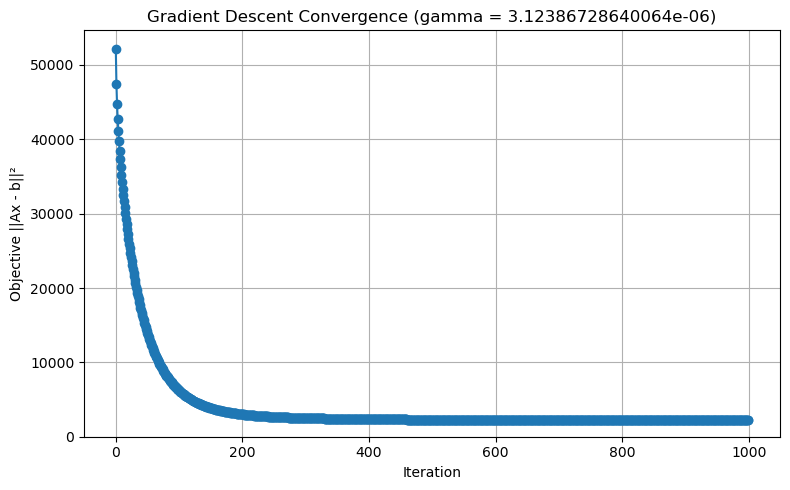

In [22]:
plot_objective(gradient_objectives_proj, gamma)

# Stochastic Gradient Descent 

In [23]:
def full_objective(A, x, b):
    """Compute the least squares objective over the whole dataset"""
    return np.mean((A.dot(x) - b)**2)

x_star = np.linalg.solve(A.T.dot(A), A.T.dot(b)) #solve A^TAx = A^Tb
best_objective = full_objective(A, x_star, b)
print("f(x*) = ", best_objective)

f(x*) =  0.03893443762565484


In [24]:
def minibatch_gradient(A, x, b):
    """
    Compute a mini-batch stochastic gradient from a subset of `num_examples` from the dataset.

    :param b: a numpy array of shape (num_examples)
    :param A: a numpy array of shape (num_examples, num_features)
    :param x: compute the mini-batch gradient at these parameters, numpy array of shape (num_features)

    :return: gradient: numpy array of shape (num_features)
    """
    # ***************************************************
    # YOUR CODE HERE

    batch_size = len(b)
    Axmb = A.dot(x) - b
    gradient = 2*A.T.dot(Axmb) / batch_size

    # TODO: implement gradient computation.
    # ***************************************************

    return gradient

In [25]:
num_trials = 10
for i in range(num_trials):
    # Try different parameter vectors $x$
    x = np.random.rand(A.shape[1])

    stochastic_gradients = []
    # *********************************************************
    # YOUR CODE HERE
    # TODO: Compute all stochastic gradients, mini-batch size 1

    for i in range(len(b)):
        stochastic_gradients.append(minibatch_gradient(A[i:i+1, :], x, b[i:i+1]))

    # *********************************************************

    # axis = 0 is the mean along the column
    mean_stochastic_gradients = np.mean(stochastic_gradients, axis = 0)

    # *********************************************************
    # YOUR CODE HERE

    full_gradient = minibatch_gradient(A, x, b)

    # *********************************************************

    # Those should be the same on average
    assert np.allclose(mean_stochastic_gradients, full_gradient)

print('Tests passed')

Tests passed


In [26]:
def stochastic_gradient(A, x, b, batch_size=1):
    """Compute a stochastic gradient"""
    dataset_size = len(b)
    indices = np.random.choice(dataset_size, batch_size, replace=False)
    return minibatch_gradient(A[indices, :], x, b[indices])

def stochastic_gradient_descent(
        data_A,
        initial_x,
        targets_b,
        batch_size,
        epochs,
        learning_rate,
        decreasing_learning_rate=False):
    """
    Mini-batch Stochastic Gradient Descent for Linear Least Squares problems.

    :param data_A: numpy array of size (num_examples, num_features)
    :param initial_x: starting parameters, a numpy array of size (num_features)
    :param targets_b: numpy array of size (num_examples)
    :param batch_size: size of the mini-batches
    :param max_iters: integer, number of updates to do
    :param learning_rate: float
    :param decreasing_learning_rate: if true, the learning rate should decay as 1 / t

    :return:
    - objectives, a list of loss values on the whole dataset, collected at the end of each pass over the dataset (epoch)
    - xs, a list of parameter vectors, collected at the end of each pass over the dataset
    """
    xs = [initial_x]  # parameters after each update
    x = initial_x
    objectives = [full_objective(data_A, x, targets_b)]  # list of the loss values after each update

    # ***************************************************
    # YOUR CODE HERE
    # TODO: implement stochastic gradient descent.

    total_iterations = 0

    print("SGD({bi:d}/{ti:d}): objective = {l:f}, total number of iterations = {ii:d}".format(
                  bi=0, ti=epochs, l=full_objective(data_A, x, targets_b), ii=total_iterations))

    for epoch in range(epochs):

      if (len(targets_b)/batch_size) != int(len(targets_b)/batch_size):
        num_iter = int(len(targets_b)/batch_size) + 1
      else:
        num_iter = int(len(targets_b)/batch_size)

      for iteration in range(num_iter):

         grad = stochastic_gradient(data_A, x, targets_b, batch_size=batch_size)

         if decreasing_learning_rate:
             gamma = learning_rate / (total_iterations + 1)
         else:
             gamma = learning_rate

         # update x through the stochastic gradient update
         x = x - gamma * grad

         total_iterations = total_iterations + 1

         # store x and objective
         xs.append(x.copy())
         objective = full_objective(data_A, x, targets_b)
         objectives.append(objective)

      print("SGD({bi:d}/{ti:d}): objective = {l:f}, total number of iterations = {ii:d}".format(
                  bi=epoch + 1, ti=epochs, l=objective, ii=total_iterations))
    # ***************************************************
    return objectives, xs

In [27]:
# Usando gamma di prima è infinitamente lento, cambio
max_iters = 50
batch_size = 128
gamma_stoc = 0.01

gradient_objectives_stoc, gradient_xs_stoc = stochastic_gradient_descent(A, x_initial, b, batch_size, max_iters, gamma)


SGD(0/50): objective = 1.000000, total number of iterations = 0
SGD(1/50): objective = 0.999192, total number of iterations = 408
SGD(2/50): objective = 0.998384, total number of iterations = 816
SGD(3/50): objective = 0.997581, total number of iterations = 1224
SGD(4/50): objective = 0.996784, total number of iterations = 1632
SGD(5/50): objective = 0.995980, total number of iterations = 2040
SGD(6/50): objective = 0.995183, total number of iterations = 2448
SGD(7/50): objective = 0.994402, total number of iterations = 2856
SGD(8/50): objective = 0.993607, total number of iterations = 3264
SGD(9/50): objective = 0.992819, total number of iterations = 3672
SGD(10/50): objective = 0.992036, total number of iterations = 4080
SGD(11/50): objective = 0.991259, total number of iterations = 4488
SGD(12/50): objective = 0.990482, total number of iterations = 4896
SGD(13/50): objective = 0.989707, total number of iterations = 5304
SGD(14/50): objective = 0.988944, total number of iterations = 

In [28]:
x_final = gradient_xs_stoc[-1]
get_results(A, b, x_final)

R2: 0.03665880737377003
MSE: 113.14870958578092
RMSE: 10.637138223497


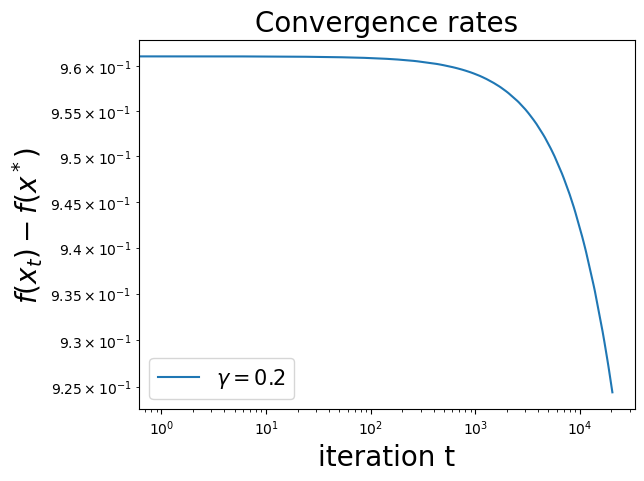

In [29]:
plt.title('Convergence rates', fontsize = 20)
plt.loglog(gradient_objectives_stoc - best_objective, label = r'$\gamma = 0.2$')
plt.xlabel('iteration t'  , fontsize = 20)
plt.ylabel(r'$f(x_t) - f(x^*)$', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

# AdaGrad

In [30]:
def ADAGRAD(A, initial_x, b, batch_size, epochs, gamma, epsilon=1e-8):

    xs = [initial_x]
    x = initial_x.copy()  # meglio fare copia per sicurezza
    objectives = [full_objective(A, x, b)]
    sizes = A.shape
    n_regressors = sizes[1]
    G = np.zeros(n_regressors)

    total_iterations = 0

    print("ADAGRAD({bi:d}/{ti:d}): objective = {l:f}, total number of iterations = {ii:d}".format(
          bi=0, ti=epochs, l=full_objective(A, x, b), ii=total_iterations))

    for epoch in range(epochs):

        if (len(b)/batch_size) != int(len(b)/batch_size):
            num_iter = int(len(b)/batch_size) + 1
        else:
            num_iter = int(len(b)/batch_size)

        for iteration in range(num_iter):

            grad = stochastic_gradient(A, x, b, batch_size=batch_size)
            G = G + grad**2  # accumulo quadrato elementi gradiente
            adjusted_grad = grad / (np.sqrt(G) + epsilon)  # divisione elemento per elemento

            x = x - gamma * adjusted_grad

            total_iterations += 1
            xs.append(x.copy())
            objective = full_objective(A, x, b)
            objectives.append(objective)

        print("ADAGRAD({bi:d}/{ti:d}): objective = {l:f}, total number of iterations = {ii:d}".format(
              bi=epoch + 1, ti=epochs, l=objective, ii=total_iterations))

    return objectives, xs


In [31]:


ADAGRAD_objective, ADAGRAD_xs = ADAGRAD(A, x_initial, b, batch_size, max_iters, gamma)

ADAGRAD(0/50): objective = 1.000000, total number of iterations = 0
ADAGRAD(1/50): objective = 0.999645, total number of iterations = 408
ADAGRAD(2/50): objective = 0.999494, total number of iterations = 816
ADAGRAD(3/50): objective = 0.999378, total number of iterations = 1224
ADAGRAD(4/50): objective = 0.999281, total number of iterations = 1632
ADAGRAD(5/50): objective = 0.999195, total number of iterations = 2040
ADAGRAD(6/50): objective = 0.999118, total number of iterations = 2448
ADAGRAD(7/50): objective = 0.999046, total number of iterations = 2856
ADAGRAD(8/50): objective = 0.998980, total number of iterations = 3264
ADAGRAD(9/50): objective = 0.998917, total number of iterations = 3672
ADAGRAD(10/50): objective = 0.998858, total number of iterations = 4080
ADAGRAD(11/50): objective = 0.998802, total number of iterations = 4488
ADAGRAD(12/50): objective = 0.998749, total number of iterations = 4896
ADAGRAD(13/50): objective = 0.998698, total number of iterations = 5304
ADAGRAD

In [32]:
x_final = ADAGRAD_xs[-1]
get_results(A, b, x_final)

R2: 0.0025551943626003215
MSE: 117.15433068240092
RMSE: 10.82378541372661


# ADAM

In [33]:
def ADAM(A, initial_x, b, batch_size, epochs, gamma, beta1, beta2, epsilon=1e-8):

    xs = [initial_x]
    x = initial_x.copy()
    objectives = [full_objective(A, x, b)]

    m = np.zeros_like(x)
    v = np.zeros_like(x)

    total_iterations = 0

    print("ADAM({bi:d}/{ti:d}): objective = {l:f}, total number of iterations = {ii:d}".format(
          bi=0, ti=epochs, l=objectives[0], ii=total_iterations))

    for epoch in range(epochs):

        if (len(b)/batch_size) != int(len(b)/batch_size):
            num_iter = int(len(b)/batch_size) + 1
        else:
            num_iter = int(len(b)/batch_size)

        for iteration in range(num_iter):

            total_iterations += 1

            grad = stochastic_gradient(A, x, b, batch_size=batch_size)

            # Update biased first and second moment estimates
            m = beta1 * m + (1 - beta1) * grad
            v = beta2 * v + (1 - beta2) * (grad ** 2)

            # Compute bias-corrected estimates
            m_hat = m / (1 - beta1 ** total_iterations)
            v_hat = v / (1 - beta2 ** total_iterations)

            # Update parameters
            x = x - gamma * m_hat / (np.sqrt(v_hat) + epsilon)

            # Store
            xs.append(x.copy())
            objective = full_objective(A, x, b)
            objectives.append(objective)

        print("ADAM({bi:d}/{ti:d}): objective = {l:f}, total number of iterations = {ii:d}".format(
              bi=epoch + 1, ti=epochs, l=objective, ii=total_iterations))

    return objectives, xs


In [34]:

beta1 = 0.9
beta2 = 0.999
# values of gamma, beta1, beta2 commonly used, for example by keras

ADAM_objective, ADAM_xs = ADAM(A, x_initial, b, batch_size, max_iters, gamma, beta1, beta2)

ADAM(0/50): objective = 1.000000, total number of iterations = 0
ADAM(1/50): objective = 0.996322, total number of iterations = 408
ADAM(2/50): objective = 0.992731, total number of iterations = 816
ADAM(3/50): objective = 0.989111, total number of iterations = 1224
ADAM(4/50): objective = 0.985550, total number of iterations = 1632
ADAM(5/50): objective = 0.982002, total number of iterations = 2040
ADAM(6/50): objective = 0.978469, total number of iterations = 2448
ADAM(7/50): objective = 0.974986, total number of iterations = 2856
ADAM(8/50): objective = 0.971502, total number of iterations = 3264
ADAM(9/50): objective = 0.968082, total number of iterations = 3672
ADAM(10/50): objective = 0.964670, total number of iterations = 4080
ADAM(11/50): objective = 0.961237, total number of iterations = 4488
ADAM(12/50): objective = 0.957863, total number of iterations = 4896
ADAM(13/50): objective = 0.954554, total number of iterations = 5304
ADAM(14/50): objective = 0.951249, total number o

In [35]:
x_final = ADAM_xs[-1]
get_results(A, b, x_final)

R2: 0.15493015987088943
MSE: 99.25721297124105
RMSE: 9.962791424658104


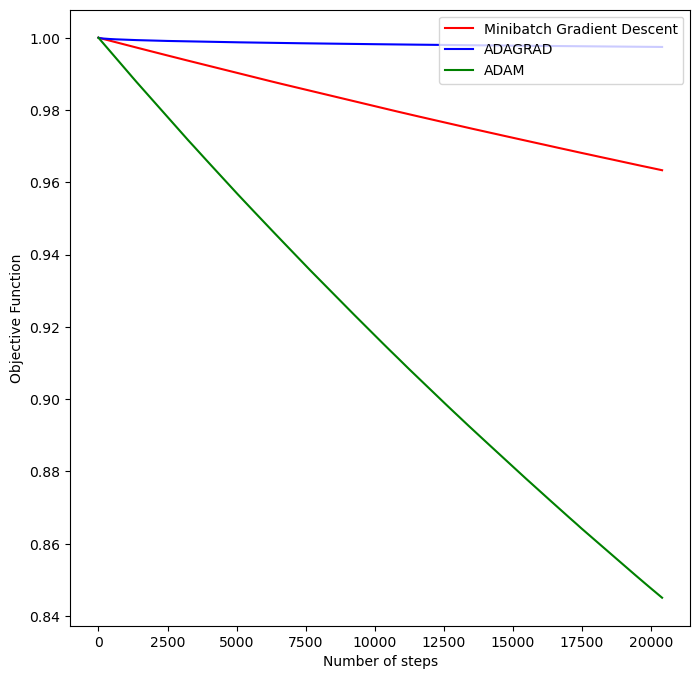

In [36]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')

plt.plot(range(len(gradient_objectives_stoc)), gradient_objectives_stoc,'red', label='Minibatch Gradient Descent')
plt.plot(range(len(ADAGRAD_objective)), ADAGRAD_objective,'blue', label='ADAGRAD')
plt.plot(range(len(ADAM_objective)), ADAM_objective,'green', label='ADAM')
plt.legend(loc='upper right')
plt.show()